##### Import Libraries / Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

##### Load in Datasets, Perform Basic Cleaning & Operations

In [2]:
train_df = pd.read_csv("data/train.csv").dropna()
test_df = pd.read_csv("data/test.csv").dropna()

In [3]:
train_df.head(1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0


In [4]:
X = train_df.drop('TARGET',axis=1)
y = train_df[['TARGET']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=42)

Notice that we are creating an "X_train" and "X_test" using the train dataframe exclusively. We will eventually apply our model on the true test dataframe.

##### Create the Model

The Y-Prediction Value has an Accuracy of 93.2% against the Y-Test Dataset.


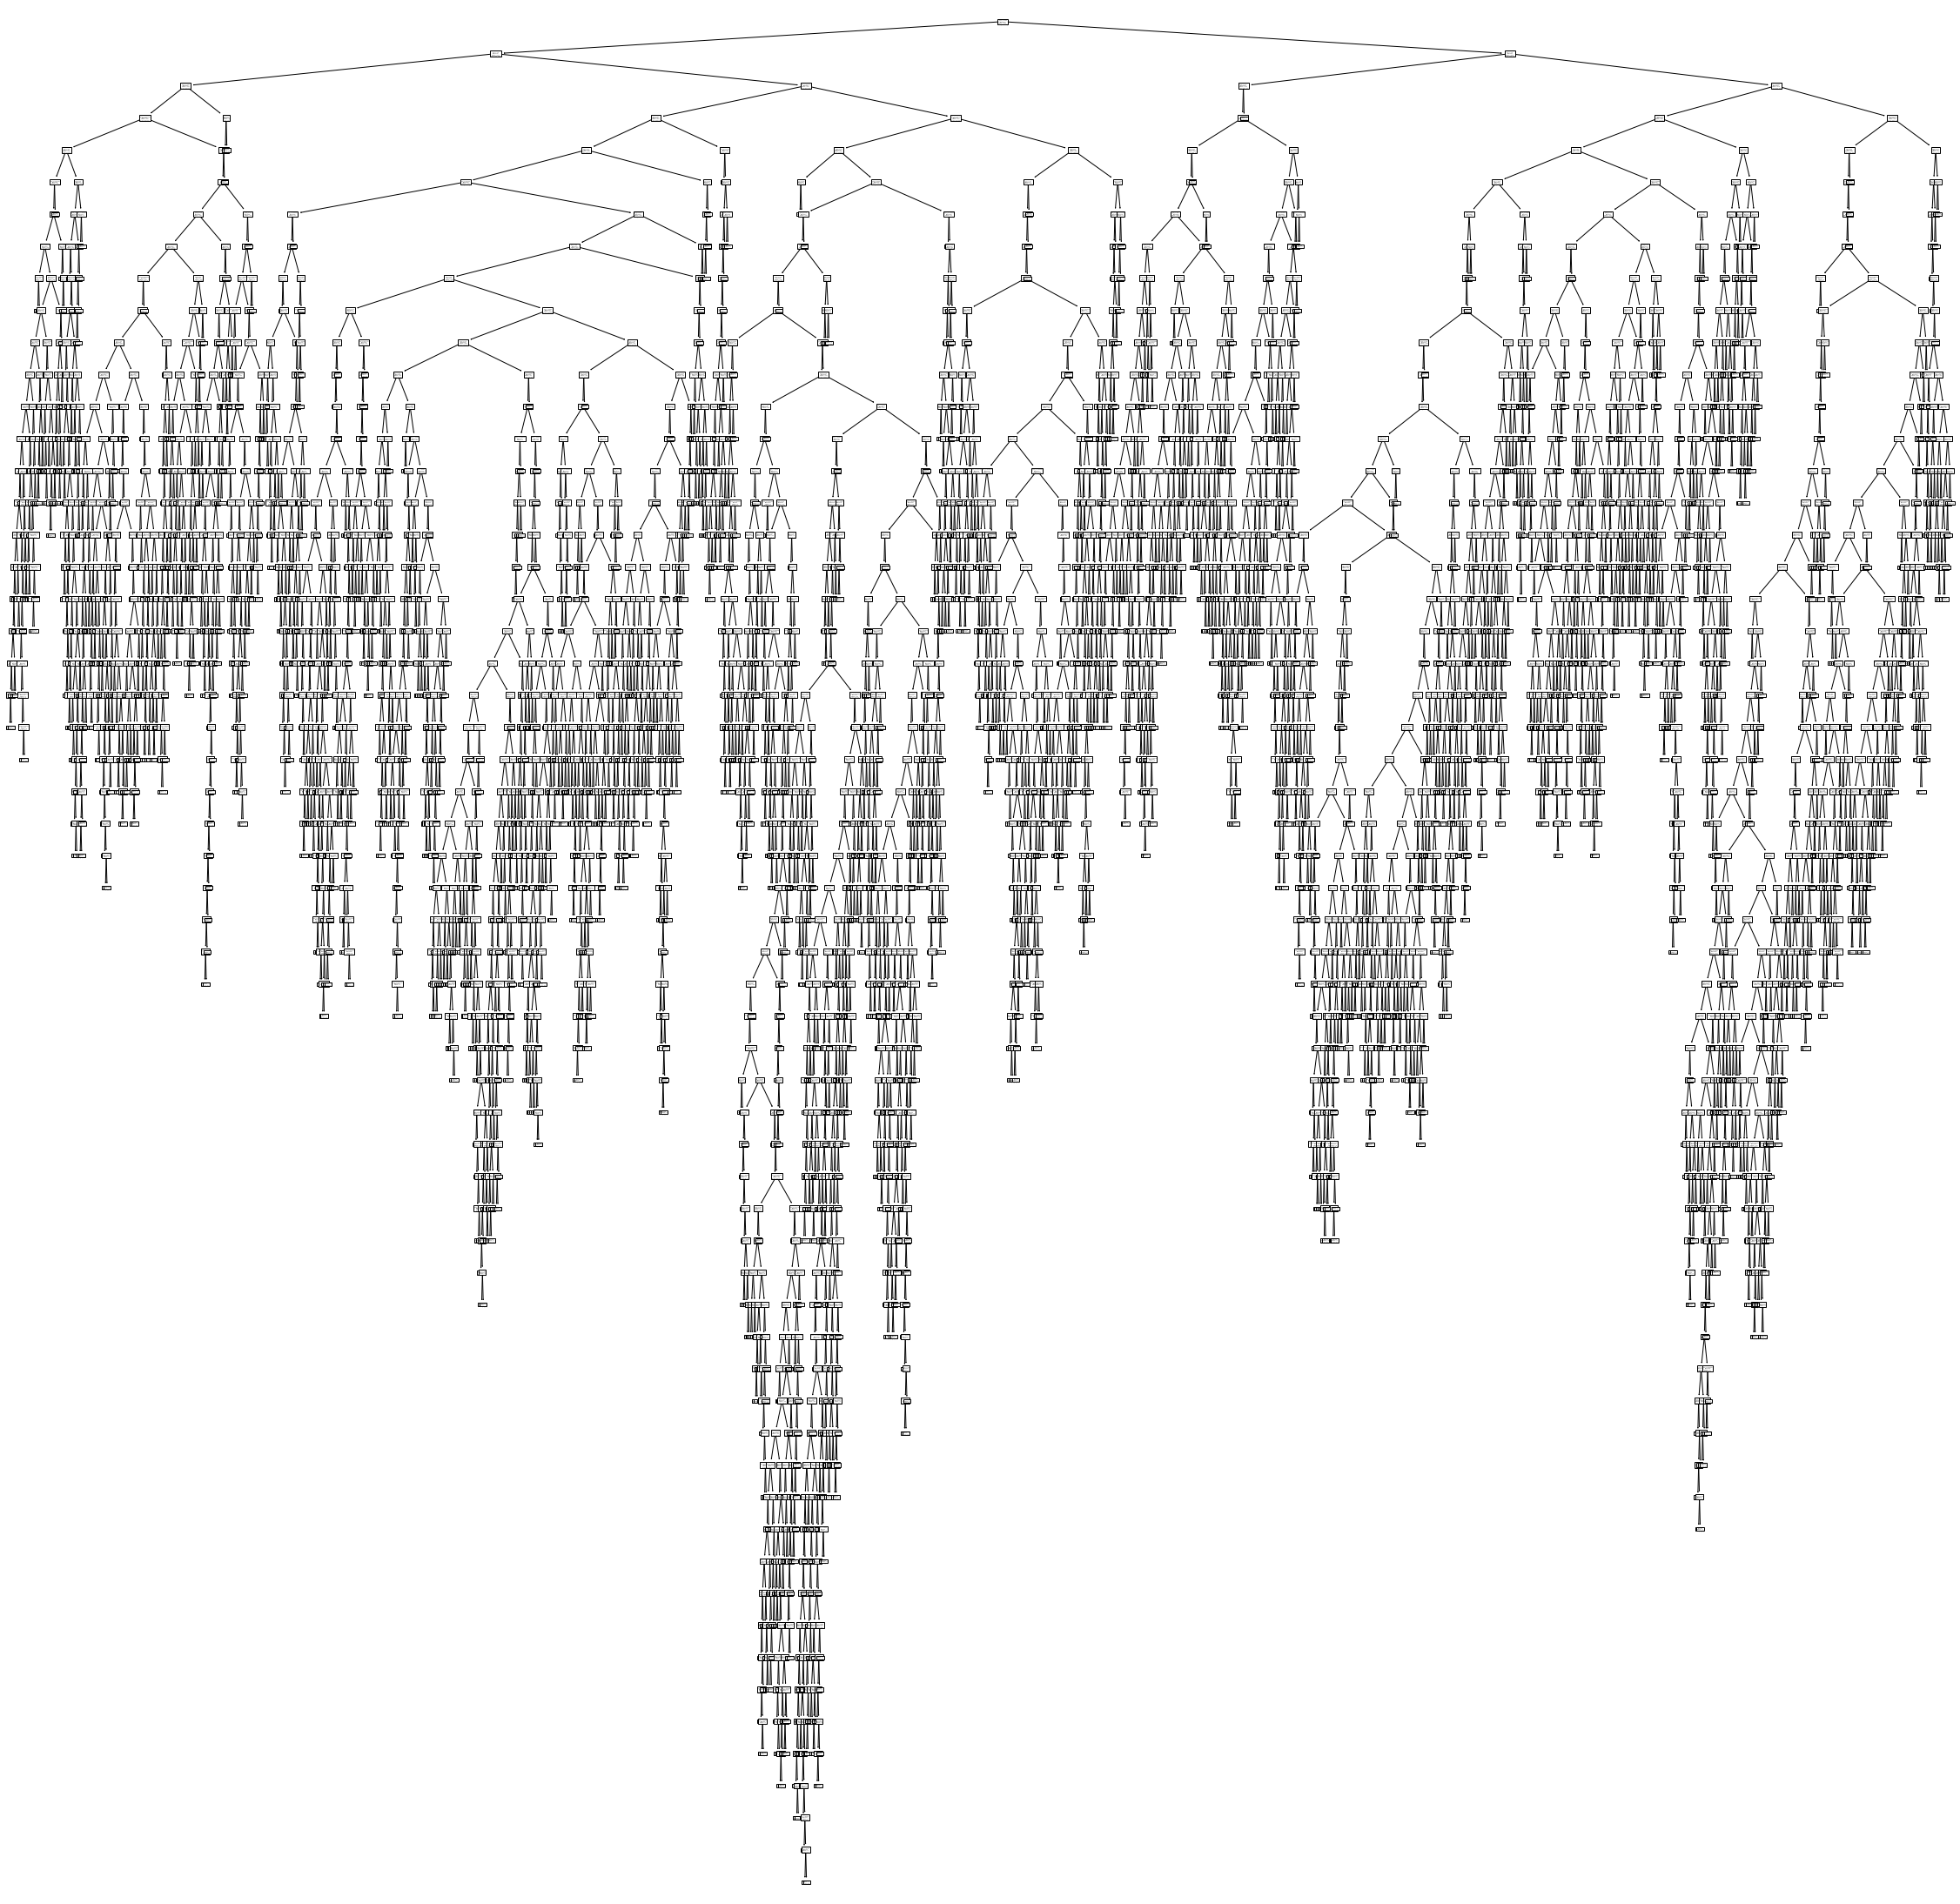

In [6]:
# Model 1 - Basically a Glorified Lookup Table
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train,y_train)

y_predict_x_test = decision_tree_model.predict(X_test)
score = accuracy_score(y_test, y_predict_x_test) * 100
print(f"The Y-Prediction Value has an Accuracy of {round(score,1)}% against the Y-Test Dataset.")

plt.figure(figsize=(40,40))
tree.plot_tree(decision_tree_model)
plt.show()

The Y-Prediction Value has an Accuracy of 96.0% against the Y-Test Dataset.


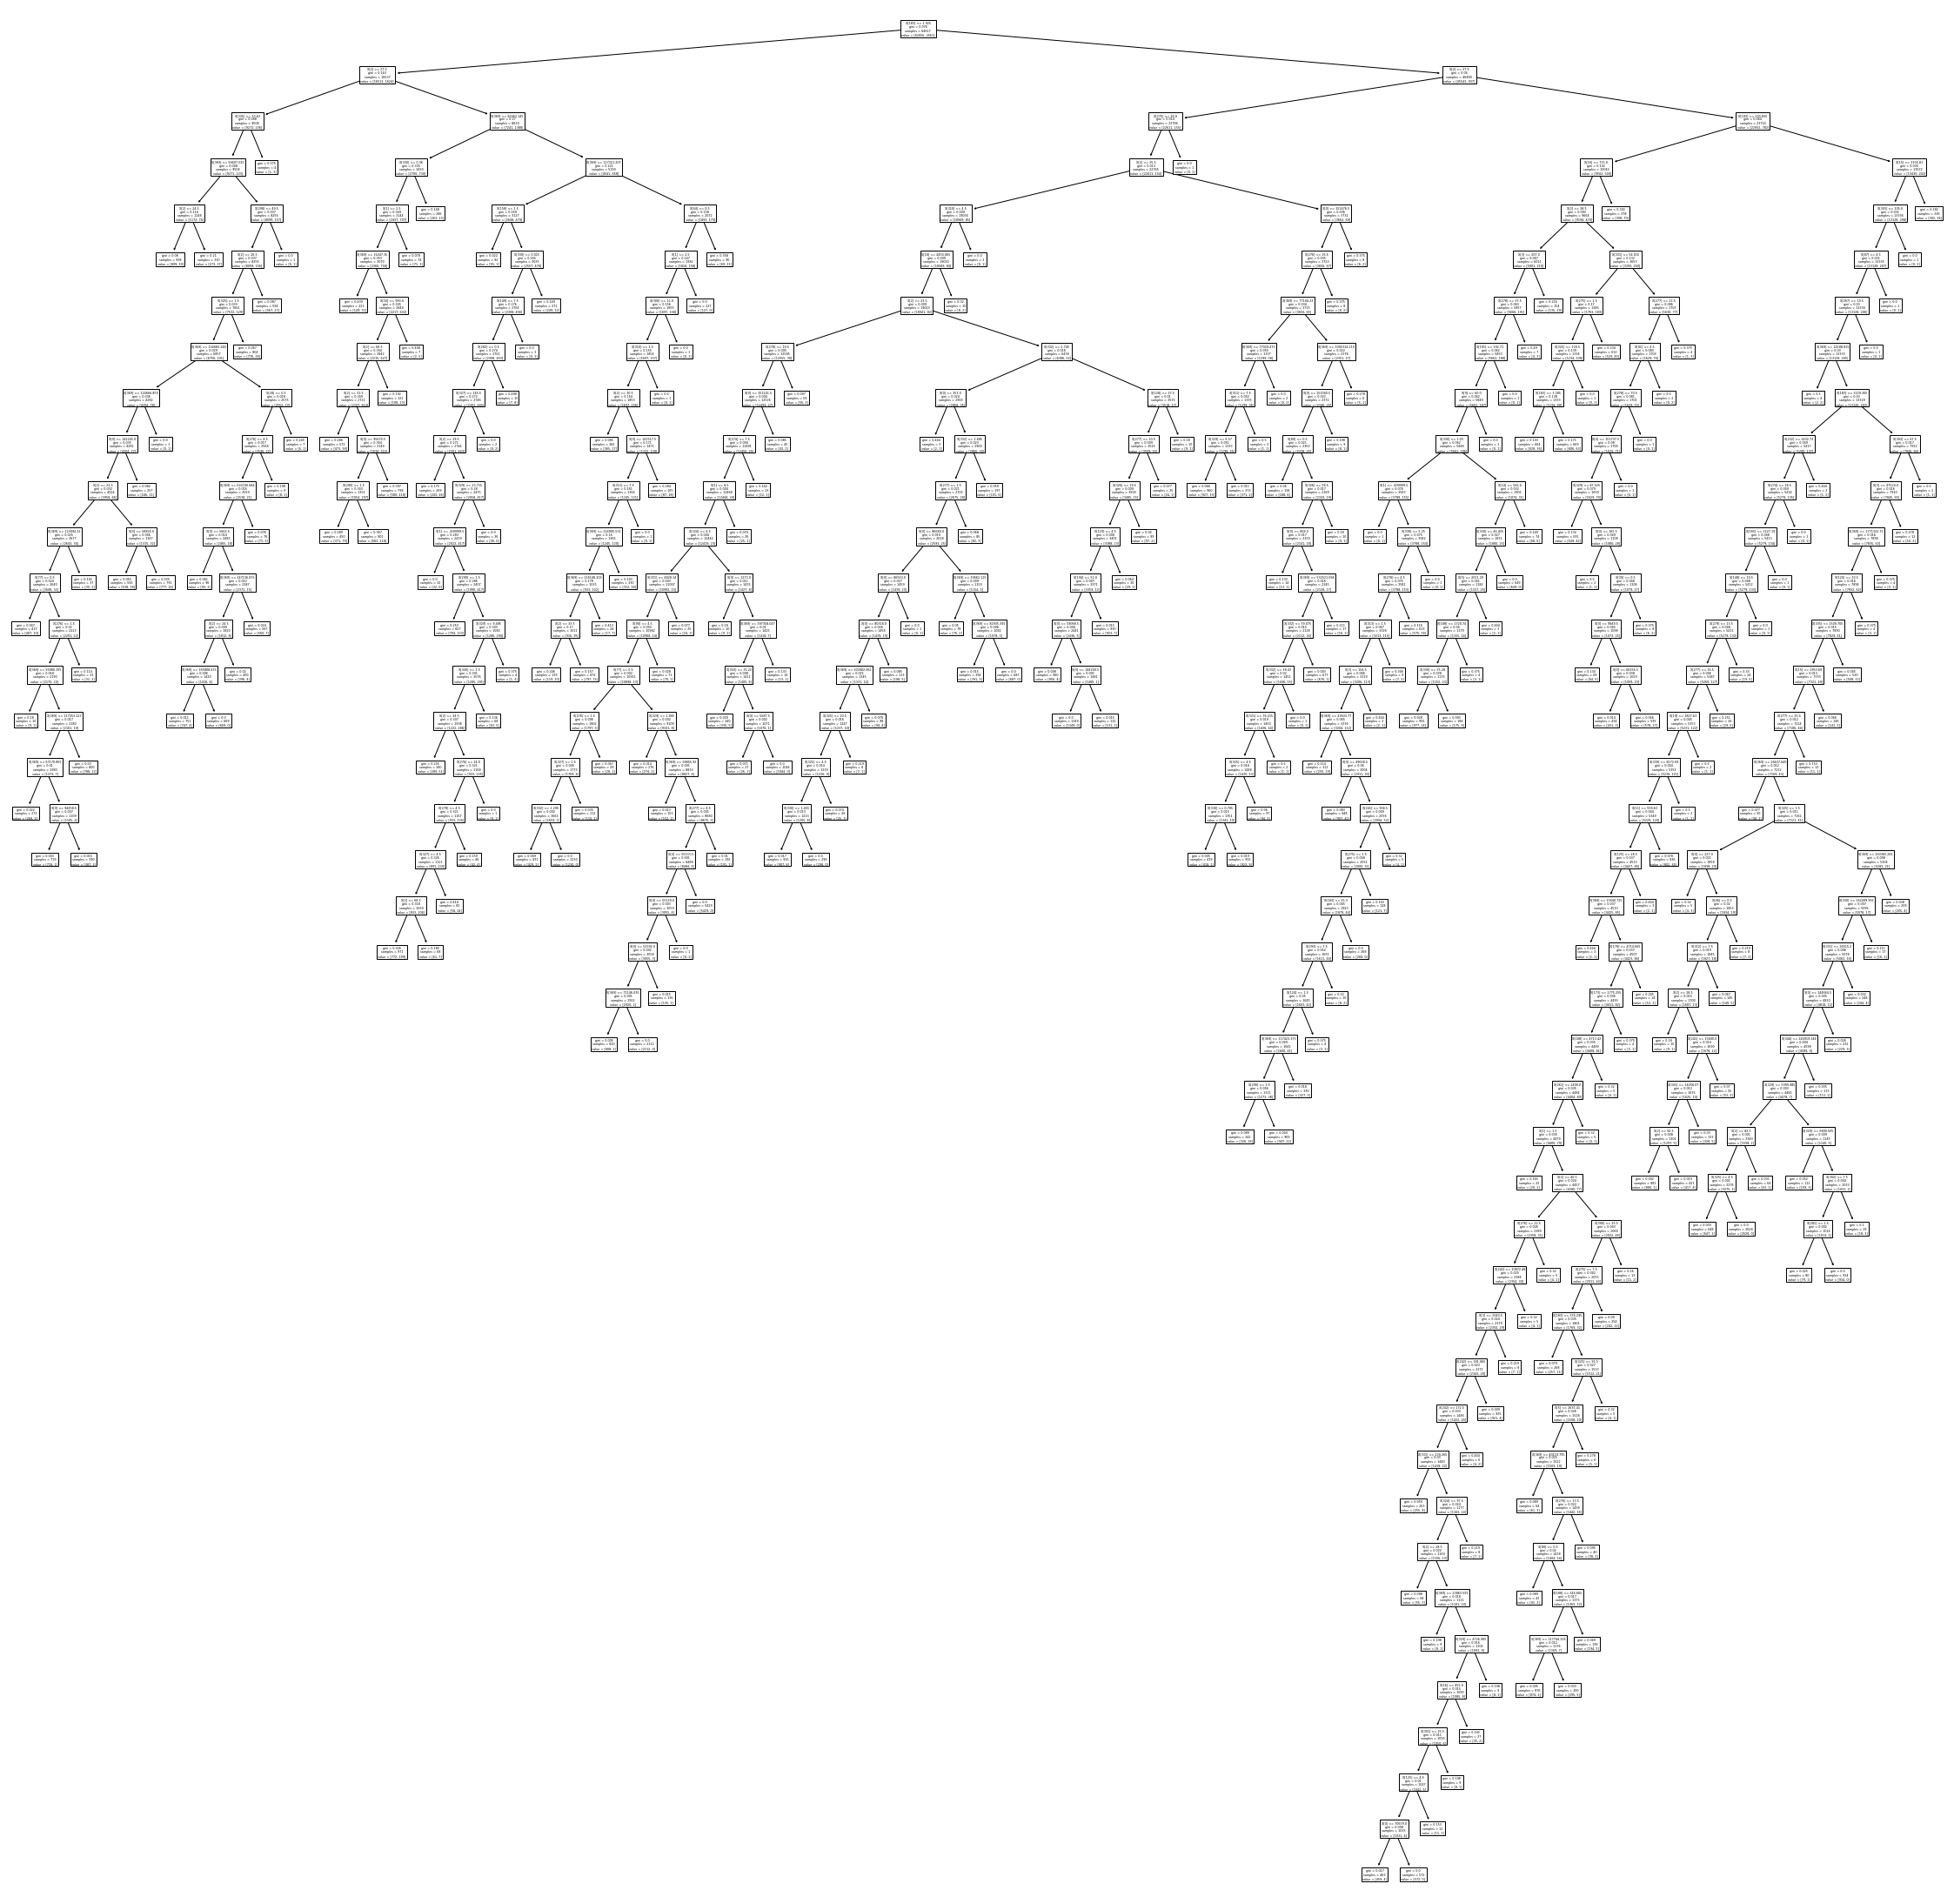

In [7]:
# Model 2
decision_tree_model = DecisionTreeClassifier(min_samples_split=1000)
decision_tree_model.fit(X_train,y_train)

y_predict_x_test = decision_tree_model.predict(X_test)
score = accuracy_score(y_test, y_predict_x_test) * 100
print(f"The Y-Prediction Value has an Accuracy of {round(score,1)}% against the Y-Test Dataset.")

plt.figure(figsize=(40,40))
tree.plot_tree(decision_tree_model)
plt.show()

The Y-Prediction Value has an Accuracy of 96.0% against the Y-Test Dataset.


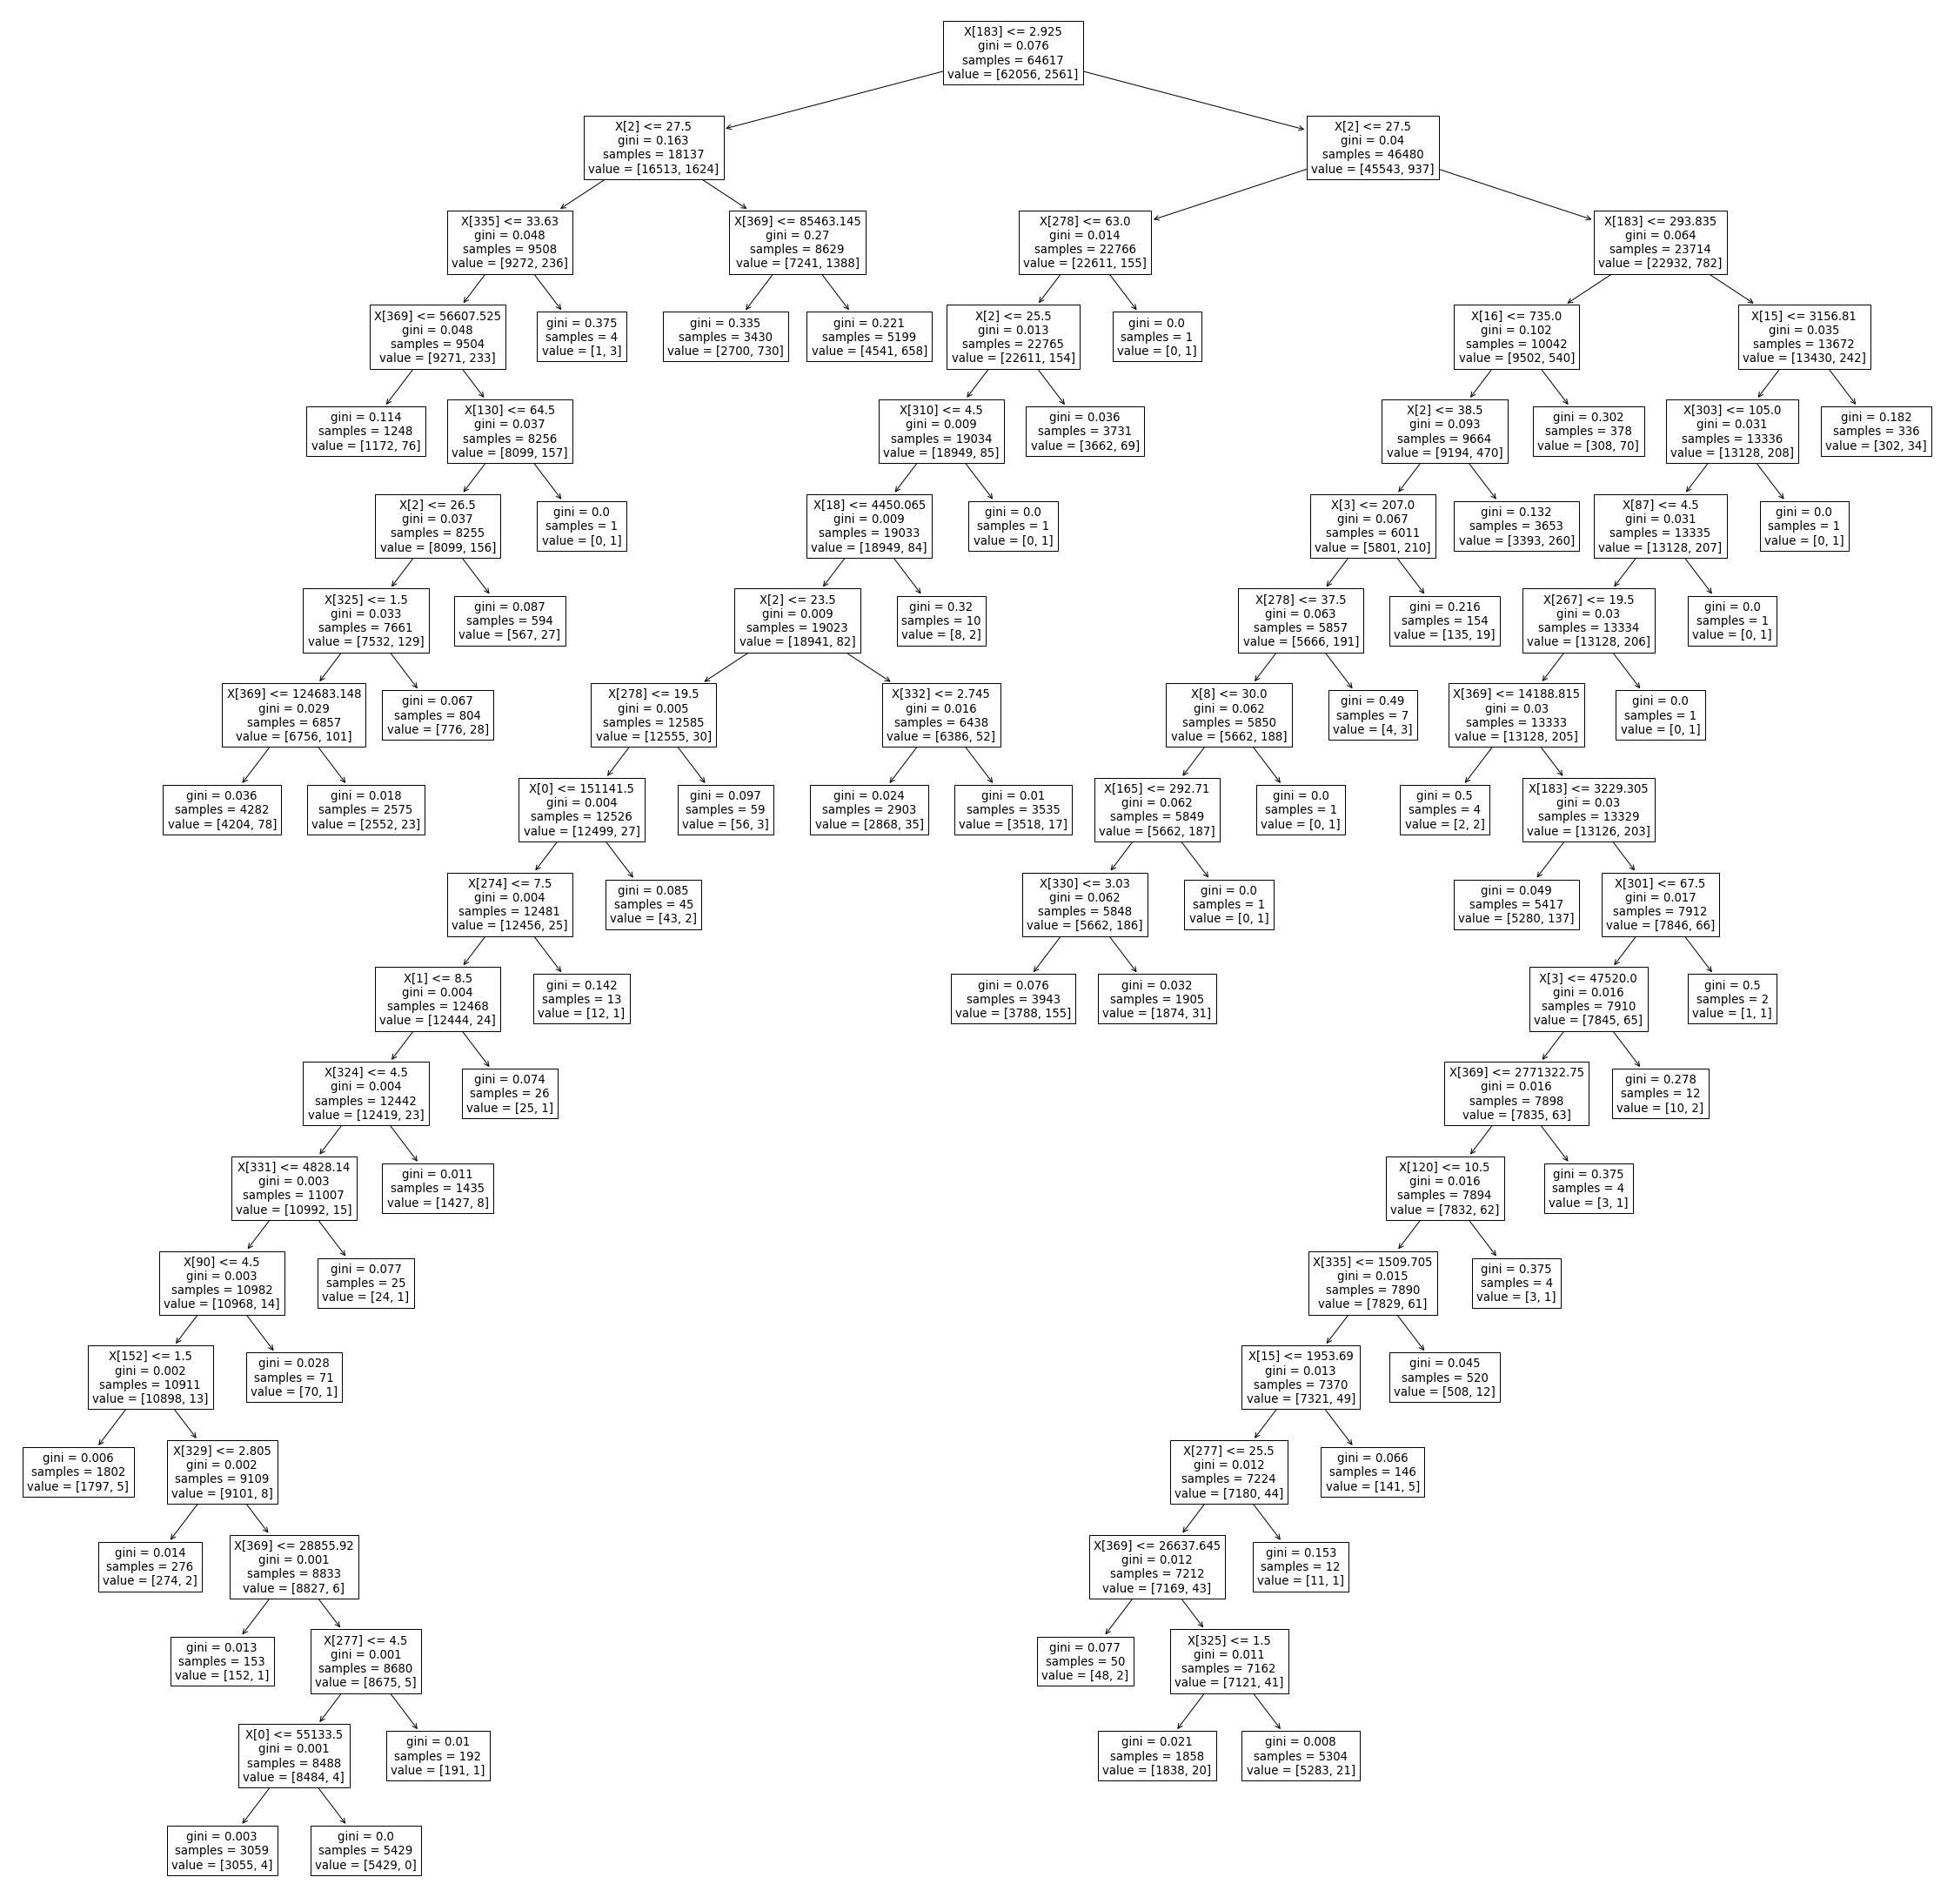

In [8]:
# Model 3
decision_tree_model = DecisionTreeClassifier(min_samples_split=5702)
decision_tree_model.fit(X_train,y_train)

y_predict_x_test = decision_tree_model.predict(X_test)
score = accuracy_score(y_test, y_predict_x_test) * 100
print(f"The Y-Prediction Value has an Accuracy of {round(score,1)}% against the Y-Test Dataset.")

plt.figure(figsize=(40,40))
tree.plot_tree(decision_tree_model)
plt.show()

The Y-Prediction Value has an Accuracy of 96.1% against the Y-Test Dataset.


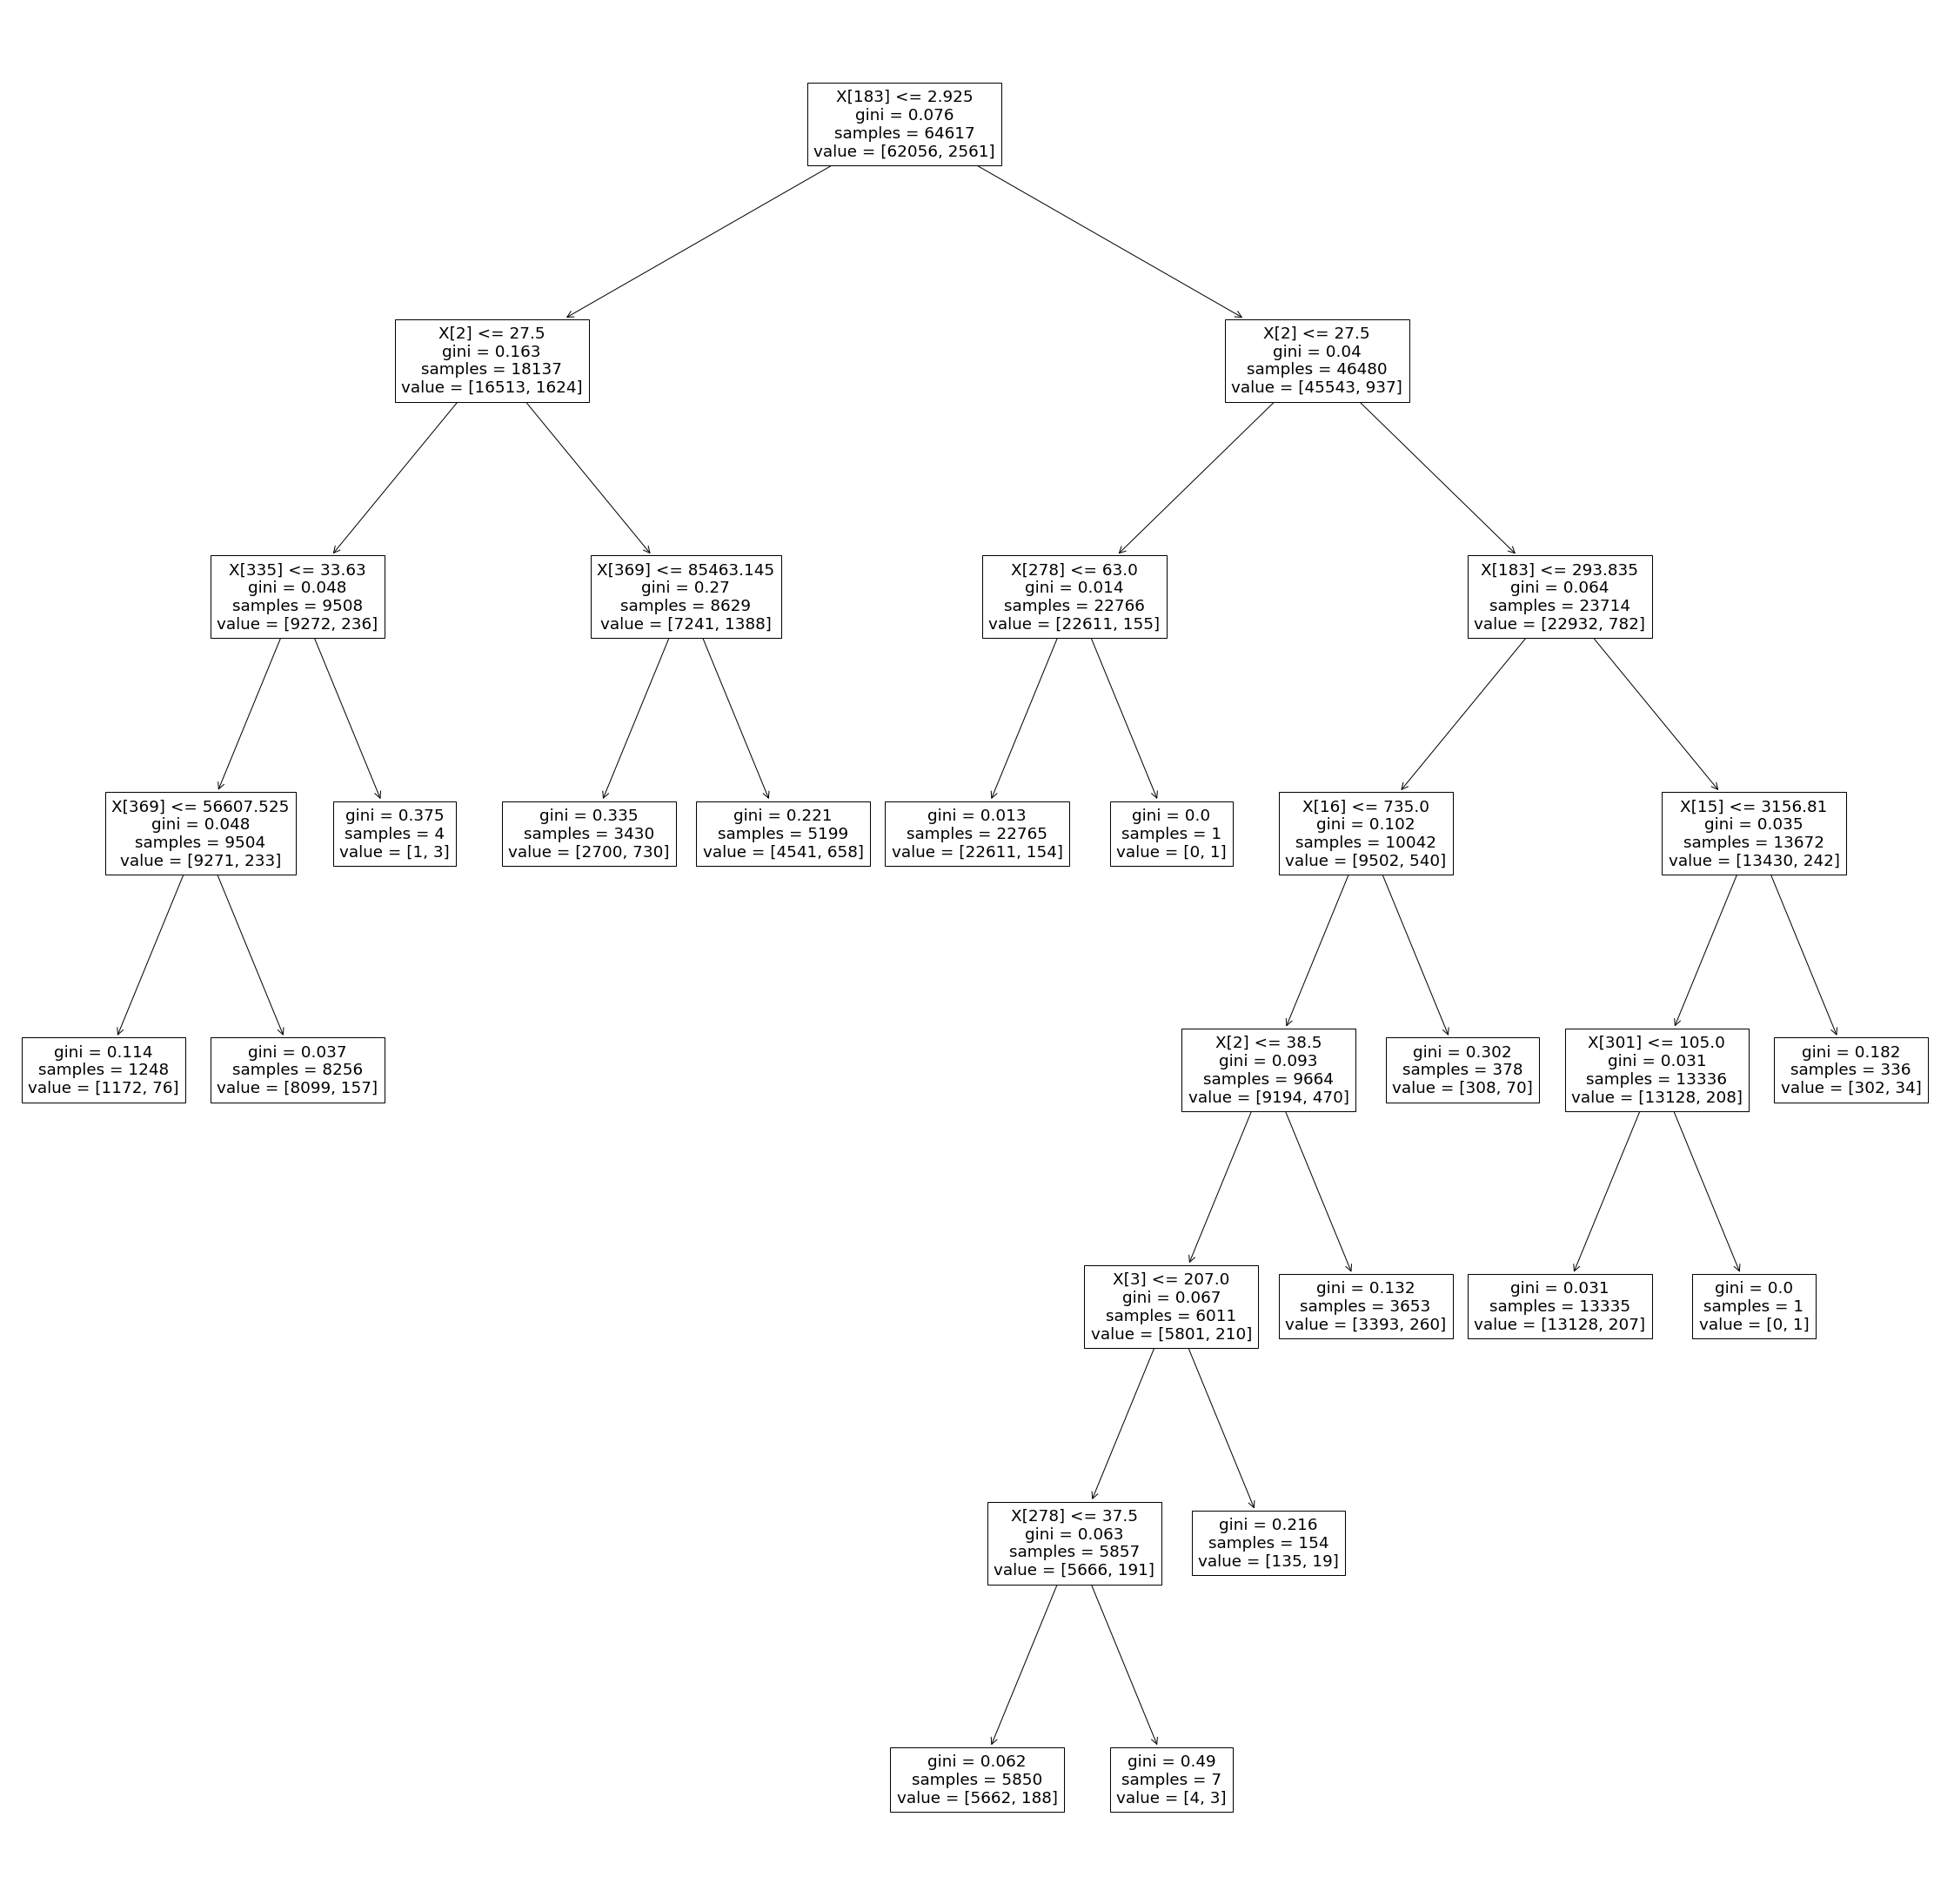

In [9]:
# Model 4
decision_tree_model = DecisionTreeClassifier(min_samples_split=5702, max_leaf_nodes=15)
decision_tree_model.fit(X_train,y_train)

y_predict_x_test = decision_tree_model.predict(X_test)
score = accuracy_score(y_test, y_predict_x_test) * 100
print(f"The Y-Prediction Value has an Accuracy of {round(score,1)}% against the Y-Test Dataset.")

plt.figure(figsize=(40,40))
tree.plot_tree(decision_tree_model)
plt.show()

# Part Two

Now that we've created a model using the training dataset and testing it against the test-subset of the training dataset, it is time to pit our model against the true test dataset.

##### Using Model 1:

In [10]:
# Kaggle Score: 0.55994
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
y_prediction = decision_tree_model.predict(test_df)

In [12]:
santander_predicted_values = y_prediction.tolist()
d = {"ID":test_df['ID'],"TARGET":santander_predicted_values}
santander_prediction_df = pd.DataFrame(d)
santander_prediction_df = santander_prediction_df.set_index('ID')

In [13]:
santander_prediction_df.to_csv("data/output/santander_submission_model_1.csv")

##### Using Model 2:

In [14]:
# Kaggle Score: 0.50186
decision_tree_model = DecisionTreeClassifier(min_samples_split=1000)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=1000,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
y_prediction = decision_tree_model.predict(test_df)

In [16]:
santander_predicted_values = y_prediction.tolist()
d = {"ID":test_df['ID'],"TARGET":santander_predicted_values}
santander_prediction_df = pd.DataFrame(d)
santander_prediction_df = santander_prediction_df.set_index('ID')

In [17]:
santander_prediction_df.to_csv("data/output/santander_submission_model_2.csv")

##### Using Model 3:

In [18]:
# Kaggle Score: 0.49987
decision_tree_model = DecisionTreeClassifier(min_samples_split=5702)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5702,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
y_prediction = decision_tree_model.predict(test_df)

In [20]:
santander_predicted_values = y_prediction.tolist()
d = {"ID":test_df['ID'],"TARGET":santander_predicted_values}
santander_prediction_df = pd.DataFrame(d)
santander_prediction_df = santander_prediction_df.set_index('ID')

In [21]:
santander_prediction_df.to_csv("data/output/santander_submission_model_3.csv")

##### Using Model 4:

In [22]:
# Kaggle Score: 0.49995
decision_tree_model = DecisionTreeClassifier(min_samples_split=5702, max_leaf_nodes=15)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5702,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
y_prediction = decision_tree_model.predict(test_df)

In [24]:
santander_predicted_values = y_prediction.tolist()
d = {"ID":test_df['ID'],"TARGET":santander_predicted_values}
santander_prediction_df = pd.DataFrame(d)
santander_prediction_df = santander_prediction_df.set_index('ID')

In [25]:
santander_prediction_df.to_csv("data/output/santander_submission_model_4.csv")

Surprisingly, as noted in the comments under each model, the one with the fewest parameters assigned ended up having the highest score in Kaggle. This is despite being considered the least accurate model when using the training dataset. More on this in the full report and video recording.